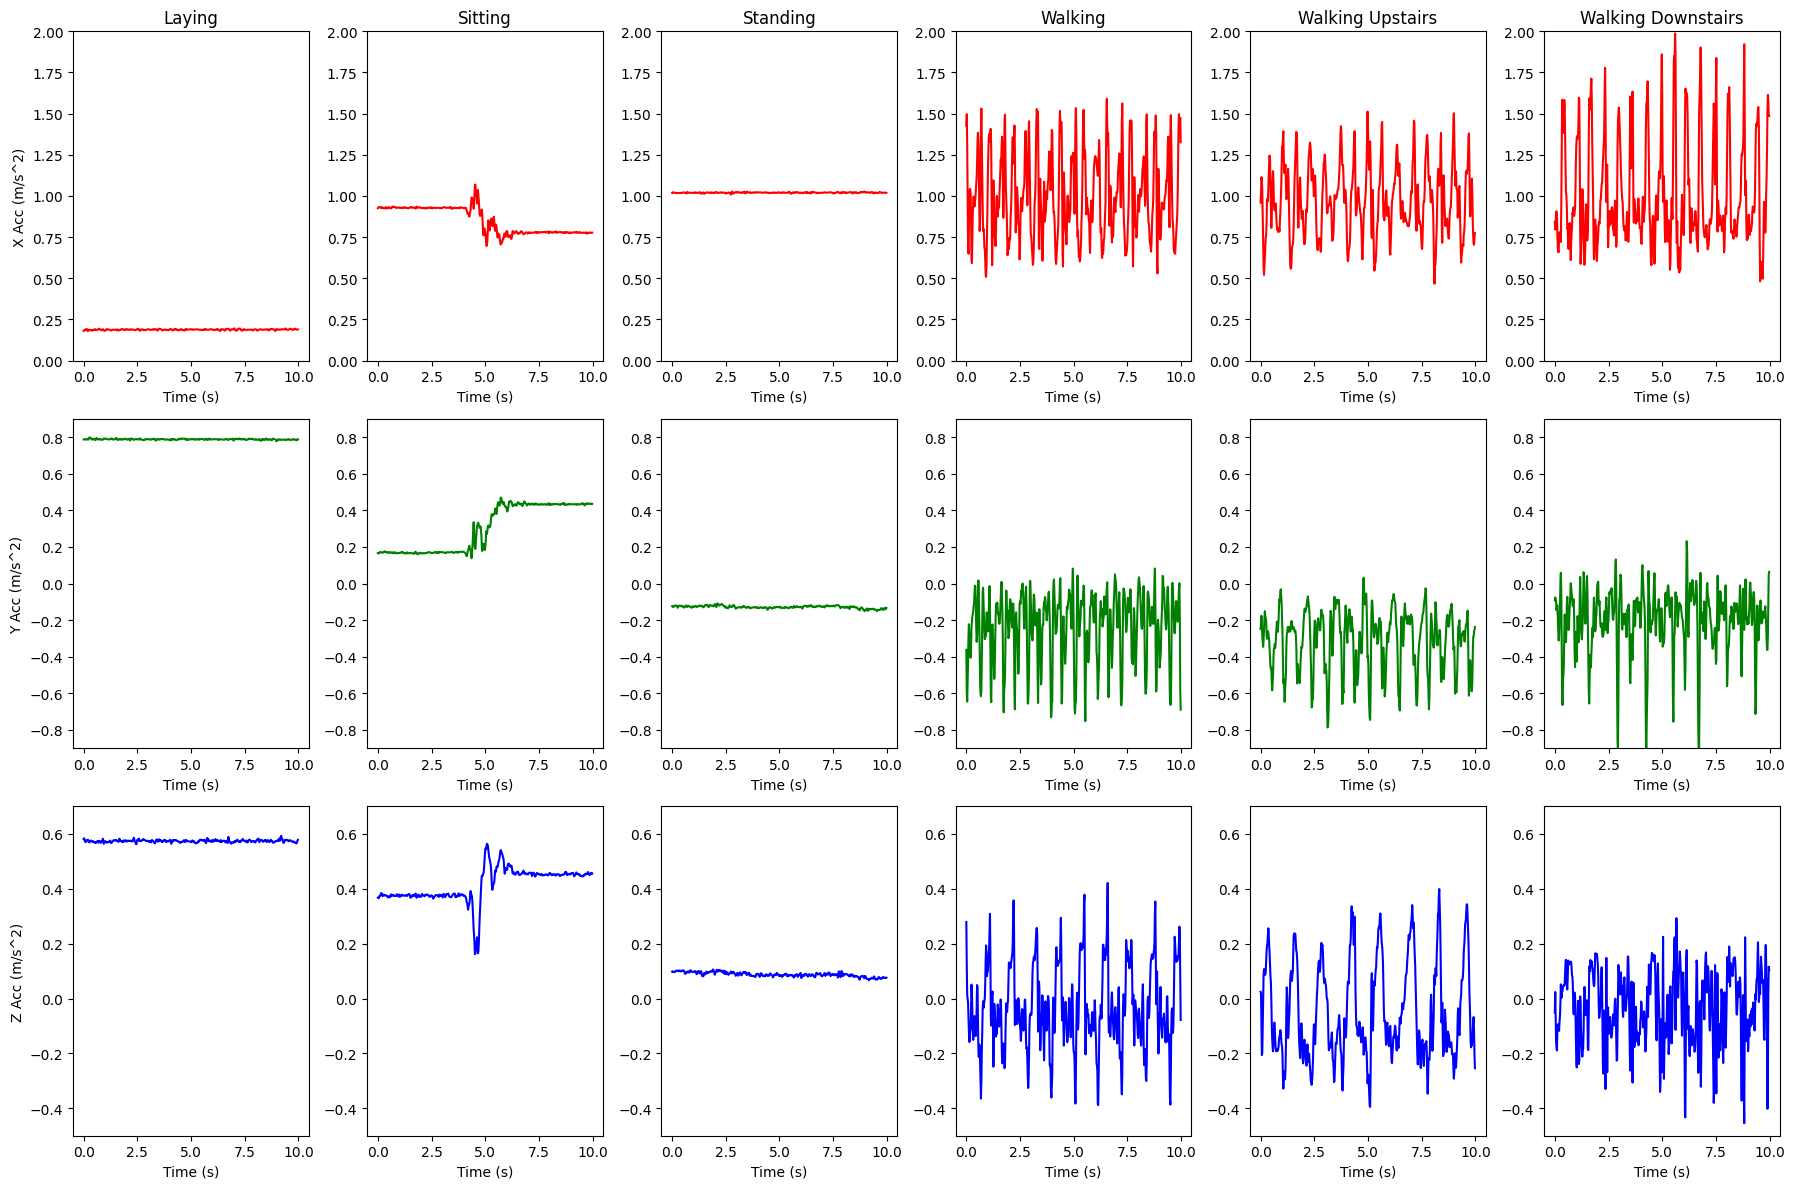

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

files = [
    r'UCI HAR Dataset\Combined\Train\LAYING\Subject_1.csv',
    r'UCI HAR Dataset\Combined\Train\SITTING\Subject_1.csv',
    r'UCI HAR Dataset\Combined\Train\STANDING\Subject_1.csv',
    r'UCI HAR Dataset\Combined\Train\WALKING\Subject_1.csv',
    r'UCI HAR Dataset\Combined\Train\WALKING_UPSTAIRS\Subject_1.csv',
    r'UCI HAR Dataset\Combined\Train\WALKING_DOWNSTAIRS\Subject_1.csv'
]

activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking Upstairs', 'Walking Downstairs']

plt.figure(figsize=(18, 12))

for i, file_path in enumerate(files):
    data = pd.read_csv(file_path)
    
    x_acc = data['accx'][:500]
    y_acc = data['accy'][:500]
    z_acc = data['accz'][:500]
    
    time = [i/50 for i in range(500)]
    
    plt.subplot(3, 6, i + 1)
    plt.plot(time, x_acc, color='r')
    plt.ylim(0,2)
    plt.title(activities[i])
    if i == 0:
        plt.ylabel('X Acc (m/s^2)')
    plt.xlabel('Time (s)')
    
    plt.subplot(3, 6, i + 7)
    plt.plot(time, y_acc, color='g')
    plt.ylim(-0.9,0.9)
    if i == 0:
        plt.ylabel('Y Acc (m/s^2)')
    plt.xlabel('Time (s)')
    
    plt.subplot(3, 6, i + 13)
    plt.plot(time, z_acc, color='b')
    plt.ylim(-0.5,0.7)
    if i == 0:
        plt.ylabel('Z Acc (m/s^2)')
    plt.xlabel('Time (s)')

plt.tight_layout()

plt.show()


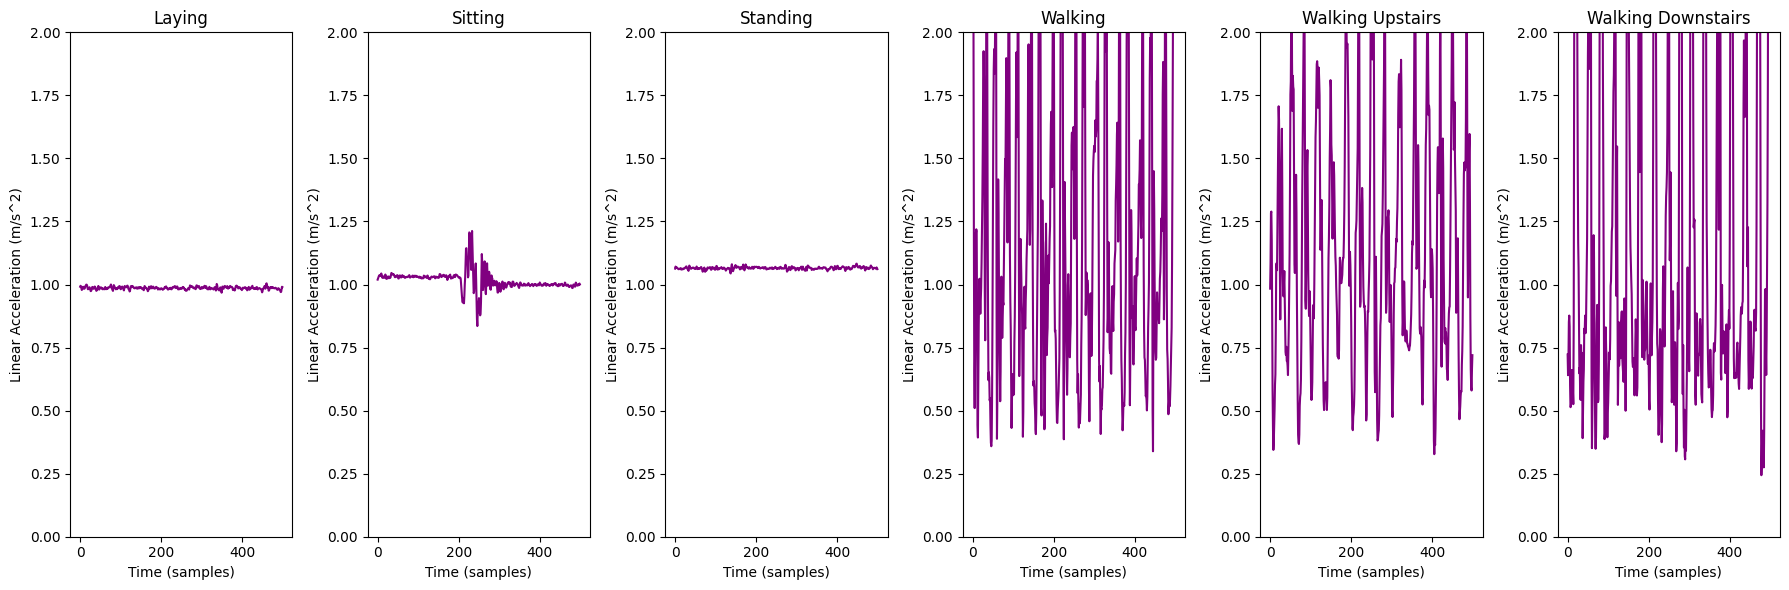

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


files = [
    r'UCI HAR Dataset\Combined\Train\LAYING\Subject_1.csv',
    r'UCI HAR Dataset\Combined\Train\SITTING\Subject_1.csv',
    r'UCI HAR Dataset\Combined\Train\STANDING\Subject_1.csv',
    r'UCI HAR Dataset\Combined\Train\WALKING\Subject_1.csv',
    r'UCI HAR Dataset\Combined\Train\WALKING_UPSTAIRS\Subject_1.csv',
    r'UCI HAR Dataset\Combined\Train\WALKING_DOWNSTAIRS\Subject_1.csv'
]

activities = ['Laying', 'Sitting', 'Standing', 'Walking', 'Walking Upstairs', 'Walking Downstairs']

plt.figure(figsize=(18, 6))


for i, file_path in enumerate(files):
    data = pd.read_csv(file_path)

    linear_acc = data['accx']**2 + data['accy']**2 + data['accz']**2

    plt.subplot(1, 6, i + 1)
    plt.plot(linear_acc[:500], color='purple')
    plt.title(activities[i])
    plt.ylim(0, 2)
    plt.xlabel('Time (samples)')
    plt.ylabel('Linear Acceleration (m/s^2)')
    
plt.tight_layout()
plt.show()

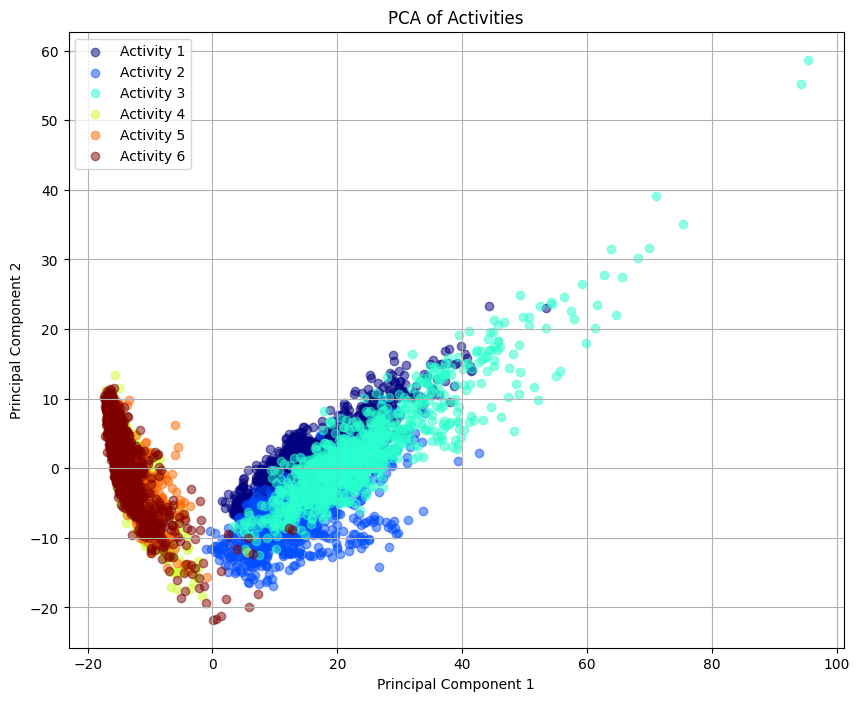

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Replace these with your actual file paths
xtrain_path = r'UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt'
ytrain_path = r'UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt'

# Load data from text files using full paths
xtrain = np.loadtxt(xtrain_path)
ytrain = np.loadtxt(ytrain_path, dtype=int)

# Preprocessing: Standardize the data
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)

# Apply PCA to reduce from 3D to 2D
pca = PCA(n_components=2)
xtrain_pca = pca.fit_transform(xtrain_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot for each activity
activities = np.unique(ytrain)
colors = plt.cm.jet(np.linspace(0, 1, len(activities)))

for i, activity in enumerate(activities):
    plt.scatter(xtrain_pca[ytrain == activity, 0], xtrain_pca[ytrain == activity, 1],
                color=colors[i], label=f'Activity {activity}', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Activities')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from MakeDataset.py import X_train, X_test, Y_train, Y_test



# Load data from text files using full paths
xtrain = np.load(X_train)

ytrain = np.load(Y_train, dtype=int)

# Preprocessing: Standardize the data
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)

# Apply PCA to reduce from 3D to 2D
pca = PCA(n_components=2)
xtrain_pca = pca.fit_transform(xtrain_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot for each activity
activities = np.unique(ytrain)
colors = plt.cm.jet(np.linspace(0, 1, len(activities)))

for i, activity in enumerate(activities):
    plt.scatter(xtrain_pca[ytrain == activity, 0], xtrain_pca[ytrain == activity, 1],
                color=colors[i], label=f'Activity {activity}', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Activities')
plt.legend()
plt.grid(True)
plt.show()


(7352, 561)